### Exercise 1. (EM for Gaussian random walk)

1. Implement the $EM$ algorithm for estimation of the measurement noise variance in the Gaussian random walk model. 
2. Simulate data with 256 time steps and test the algorithm. How many iterations are needed for convergence?

### Solution Exercise 1.

Recall that the random walk can be written in state space form in the following way:

$$
x_k = x_{k - 1} + q  \qquad q \sim \mathcal{N}(0, Q)
$$
$$
y_k = x_{k} + r \qquad r \sim \mathcal{N}(0, R)
$$

In order to derive the $EM$ algorithm for the random walk we should write down the complete data log-likelihood for the model given a set of parameters $\mathbf{\theta}$ which is:

$$
 \log p(\mathbf{y}_{1:T}, \mathbf{x}_{0:T} | \theta) = \log(x_0|\theta) + \sum_{k=1}^T \log p(x_k|x_{k-1}, \theta) + \sum_{k=1}^T \log p(y_k | x_k,\theta)
$$

To make the $E$ step we define the function $Q(\theta, \theta^{(n)})$:

$$
\begin{align}
Q(\theta, \theta^{(n)})& = E[\log p(\mathbf{y}_{1:k}, \mathbf{x}_{0:k} | \theta)] \\
                       & = E[\log(x_0|\theta)] + \sum_{k=1}^T E[ \log p(x_k|x_{k-1}, \theta) ] + \sum_{k=1}^T E[\log p(y_k | x_k,\theta)]
\end{align}
$$

where the expectation $E[.]$ is defined in terms of $p(\mathbf{x}_{0:T} | \theta^{(n)}, \mathbf{y}_{1:T})$. Formally,

$$
E[g(x)] = \int g(\mathbf{x}_{0:T}) p(\mathbf{x}_{0:T} | \theta^{(n)}, \mathbf{y}_{1:T}) d\mathbf{x}_{0:T}
$$

Recall that in this case the parameter we want to estimate is the measurement noise variance ($R$) and it only affects $ p(y_k | x_k)$. Then the function $Q(.,.)$ can be rewritten as follows:


$$
\begin{align}
Q(R, R^{(n)})& =  \sum_{k=1}^T E[\log p(y_k | x_k, R)] + constant \\
                       & = \sum_{k=1}^T \int \log p(y_k | x_k, R) p(x_k | R^{(n)}, \mathbf{y}_{1:T}) d{x}_{k} + constant
\end{align}
$$

Now we need to derive the $M$ step. In this step we have to optimize $Q(.,.)$ with respect to $R$. Expanding the last expression we get:



$$
\begin{align}
Q(R, R^{(n)}) & = \sum_{k=1}^T \int \bigg(-\frac{1}{2}\log 2\pi - \frac{1}{2}\log R - \frac{(y_k - x_k)^2}{2R}\bigg) \mathcal{N}(x_k | m_k^s, P_k^s) d{x}_{k} + constant \\
              & = \sum_{k=1}^T \int \bigg(-\frac{1}{2}\log 2\pi - \frac{1}{2}\log R - \frac{(y_k - x_k)^2}{2R}\bigg) \mathcal{N}(x_k | m_k^s, P_k^s) d{x}_{k} + constant \\
              & = \sum_{k=1}^T -E[\frac{1}{2}\log 2\pi] - E[\frac{1}{2}\log R] - \frac{E[y_k^2]}{2R} + \frac{E[y_k x_k]}{2R} - \frac{E[x_k^2]}{2R} + constant\\
              & = \sum_{k=1}^T - \frac{1}{2}\log R - \frac{y_k^2}{2R} +  \frac{2 y_k E[x_k]}{2R} - \frac{E[x_k^2]}{2R} + constant \\
              & = \sum_{k=1}^T - \frac{1}{2}\log R - \frac{y_k^2}{2R} +  \frac{y_k m_k^s}{R} - \frac{P_k^s + (m_k^s)^2 }{2R} + constant \\
              & = \sum_{k=1}^T - \frac{1}{2}\log R - \frac{y_k^2}{2R} +  \frac{y_k m_k^s}{R} - \frac{P_k^s}{2R} - \frac{(m_k^s)^2 }{2R} + constant
\end{align}
$$

Recall that the the expectation above $E[.]$ is defined in terms of the probability distribution $\mathcal{N}(x_k | m_k^s, P_k^s)$ where $m_k^s$ and $P_k^s$ are the resulting mean and covariance from the $RTS$ smoother for state $x_k
$.

Now we have to maximize $Q(R, R^{(n)})$ with respect to $R$. Taking derivatives we have.

$$
\begin{align}
\frac{\partial Q(R, R^{(n)})}{\partial R} & = \frac{\partial }{\partial R} \bigg( \sum_{k=1}^T - \frac{1}{2}\log R - \frac{y_k^2}{2R} +  \frac{y_k m_k^s}{R} - \frac{P_k^s}{2R} - \frac{(m_k^s)^2 }{2R} \bigg) \\
                                          & = \sum_{k=1}^T - \frac{1}{2R} + \frac{y_k^2}{2 R^2} -  \frac{y_k m_k^s}{R^2} + \frac{P_k^s}{2R^2} + \frac{(m_k^s)^2 }{2R^2}
\end{align}
$$

Now we have to make the derivative equal to $0$ in order to maximize:

$$
\begin{align}
\sum_{k=1}^T - \frac{1}{2R} + \frac{y_k^2}{2 R^2} -  \frac{y_k m_k^s}{R^2} + \frac{P_k^s}{2R^2} + \frac{(m_k^s)^2 }{2R^2}
& = 0 \\
\sum_{k=1}^T - \frac{R}{2} + \frac{y_k^2}{2} - {y_k m_k^s} + \frac{P_k^s}{2} + \frac{(m_k^s)^2 }{2}
& = 0 \\
 -\frac{RT}{2} + \sum_{k=1}^T  \frac{y_k^2}{2} - {y_k m_k^s} + \frac{P_k^s}{2} + \frac{(m_k^s)^2 }{2}
& = 0 \\
\end{align}
$$

The last equality defines an update equation for $R$ using the output (i.e $m_k^s$, $P_k^s$) of the *RTS* smoother using the old value of $R$ (i.e. $R^{(n)}$). Namely,

$$
\begin{align}
R = \frac{1}{T} \sum_{k=1}^T  {y_k^2} - 2{y_k m_k^s} + {P_k^s} + {(m_k^s)^2 }
\end{align}
$$

Now we are able to iteratively estimate the value of $R$. The implementation is based on the EFK/UKF toolbox since the Kalman filtering and RTS smoothing were already implemented in previous rounds.

In [ ]:
%%script octave
   
%% Data Generation

A = 1;
H = 1;
steps = 256;
T = 1:steps;
x = randn;

Q = 0.1;
R = 3.0;

X = zeros(1, steps);
Y = zeros(1, steps);
for i = 1:steps
    x = A * x + sqrt(Q) * randn;
    y = H * x + sqrt(R) *randn;
    X(i) = x;
    Y(i) = y;
end


%% EM


em_iteraciones = 100;

R_est = 100; % initial estimation

est = zeros(1, em_iteraciones);

for i = 1:em_iteraciones

    % Kalman Filtering with current parameter value
    m0 = 0.0;
    P0 = 1;
    m = m0;
    P = P0;
    MM = zeros(size(m,1),size(Y,2));
    PP = zeros(size(m,1),size(m,1),size(Y,2));
    for k=1:size(Y,2)
        [m,P] = kf_predict(m,P,A,Q);
        [m,P] = kf_update(m,P,Y(:,k),H,R_est); % using the current estimate
        MM(:,k) = m;
        PP(:,:,k) = P;
    end
    % RTS Smoothing 
    [SM,SP] = rts_smooth(MM,PP,A,Q);
    % Actual EM
    new_R_est = sum(Y .* Y) - 2 * sum(Y .* SM) + sum(SP) + sum(SM .* SM);
    new_R_est = new_R_est / size(Y, 2);
    R_est = new_R_est;
    est(i) = R_est;
end

time = 1:em_iteraciones;
plot(time , est, time, R );
legend('EM Estimation','Real Value');

In [3]:
from IPython.display import Image

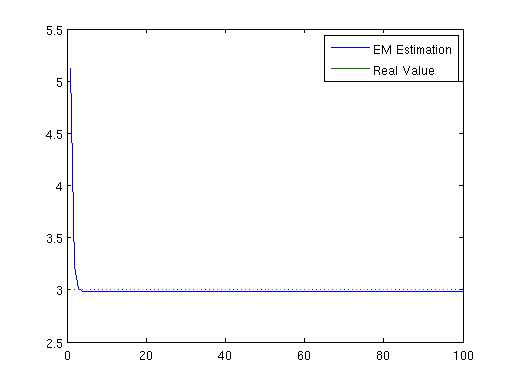

In [6]:
Image(filename='em_convergence_8_1.png') 

Real Value | EM Estimate | Error
--- | --- | ---
3.0 | 2.9806 | 0.0194

### Exercise 2. (Energy function approach).

1. Implement the algorithm for computing the energy function for the Gaussian random walk model as well as its derivative with respect to the noise variance (via the sensitivity equations in Appendix A.3 in Simos book).
2. Generate some simulated data (you can use the same data in both Exercise 1 and 2) and use a gradient based optimization method (e.g. fminunc in Matlab) to find the ML estimate of the parameter.
3. Plot the likelihood curve for values around the true value.

### Solution Exercise 2.

The energy function for the given model depends on the unknown parameter $\theta$ (i.e. measurement variance) and can be recursively computed using the following expression:

$$
    \varphi_k(\theta) = \varphi_{k-1}(\theta) + \frac{1}{2} \log | 2 \pi S_k(\theta)| + \frac{v_k(\theta)^2}{S_k(\theta)} 
$$

Where the terms $S_k(R)$ and $v_k(R)$  are given by the Kalman filter iteration over the whole measurements sequece fixing the measurement variance to $\theta$. 

The derivative with respect to $R$ can also be recursively computed as follows (*Bayesian Filtering and Smoothing, Appendix A.3*)


$$
    \varphi^{'}_k(\theta) = \varphi^{'}_{k-1}(\theta) + \frac{S^{'}_k(\theta)}{2S_k(\theta)}  + \frac{v_k(\theta) v^{'}_k(\theta)}{S_k(\theta)} - \frac{v^2_k(\theta) S^{'}_k(\theta)}{2S^2_k(\theta)}
$$

Where:

$$
\begin{align}
S^{'}_k(\theta) &= P^{' -}_k(\theta) + R^{'}(\theta)\\
v^{'}_k(\theta) &= - m^{' -}_k(\theta) \\
m^{' -}_k(\theta)&= m^{'}_{k-1}(\theta) \\
P^{' -}_k(\theta) &= P^{'}_{k-1}(\theta) \\ 
R^{'}(\theta) &= 1
\end{align}
$$



In the above derivation it has been taken into account that $A'(\theta) = H'(\theta) = Q'(\theta) = 0$ Since they don't depend on the measurement noise.

We are left with the problem of computing $m^{'}_{k-1}(\theta)$ and $P^{'}_{k-1}(\theta)$ which can be done using the following update equation for $m^{'}_{k}(\theta)$ and $P^{'}_{k}(\theta)$  :

$$
\begin{align}
m^{'}_{k}(\theta) &= m^{' -}_{k}(\theta) + K^{'}_k(\theta) v_k(\theta) + K_k(\theta) v^{'}_k(\theta)   \\
P^{'}_{k}(\theta) &= P^{' -}_{k}(\theta) - 2 K^{'}_k(\theta) S_k(\theta) K_k(\theta) - (K_k(\theta))^2 S^{'}_k(\theta)\\
K^{'}_k(\theta) &=   \frac{P^{' -}_{k}(\theta)}{S_k(\theta)} - \frac{P^{-}_{k}(\theta) S^{'}_k(\theta)}{S_k(\theta)^2}
\end{align} 
$$

The algorithm is implemented below. First of all the objective function and its corresponding gradients are defined.

In [ ]:
function [f, g] = objective_and_gradient(theta)

    % Data Generation
    
    % Lock seed
    randn('state',123);  % make sure the same data is generated each time  
    A = 1;
    H = 1;
    steps =5000;
    T = 1:steps;
    x = randn;

    Q = 0.1;
    R = 3.0;

    X = zeros(1, steps);
    Y = zeros(1, steps);
    for i = 1:steps
        x = A * x + sqrt(Q) * randn;
        y = H * x + sqrt(R) *randn;
        X(i) = x;
        Y(i) = y;
    end
    
    % Do Kalman Filtering
    
    m2 = 0;  % Initialize first step
    P2 = 1; % Some uncertanty in covariance
    
    % Store useful variables
    SSk = zeros(1, steps);
    vvk = zeros(1, steps);
    KKk = zeros(1, steps);
    Pk_pred = zeros(1, steps);

    % Run Kalman filter
    for k=1:steps
      % Prediction step
      m2 = A * m2;
      P2 = A * P2 * A' + Q;
      Pk_pred(k) = P2;
      % Update step
      vk = Y(k) - H * m2;
      Sk = H * P2 * H' + theta; % using the current parameter
      Kk = (P2 * H') / Sk;
      m2 = m2 + Kk * vk;
      P2 = P2 - Kk * Sk * Kk';
      % Store the results
      SSk(k) = Sk;
      vvk(k) = vk;
      KKk(k) = Kk;
    end
    
    % A gaussian prior was assumed over theta
    m_theta = 0;
    P_theta = 1;
    % initialization of energy function (-log P(theta))
    f = 0.5 * log(2 * pi * P_theta) + (theta - m_theta)^2/(2*P_theta);
    % initialization of the gradient of the energy function
    % derivative wrt theta of -log P(theta)
    g = (theta - m_theta) / P_theta;
    % initial values for recursion
    % they don't depend on theta so derivative is zero
    mkp = 0; 
    Pkp = 0;
    for k = 1:steps
        % objective function recursion
        f = f + 0.5 * log(abs(2*pi*SSk(k))) + 0.5*(vvk(k)^2)/SSk(k);
        % gradient recursion
        mkp_ = mkp;
        Pkp_ = Pkp;
        Skp = Pkp_ + 1;
        vkp = -mkp_ ;
        g = g + Skp/(2*SSk(k)) + (vvk(k)*vkp)/SSk(k) ...
            - 0.5 * ((vvk(k)^2) * Skp)/(SSk(k)^2);
        % Computing the current values necessary for next iteration
        KKp = Pkp_/SSk(k) - (Pk_pred(k) * Skp) / (SSk(k)^2);
        mkp = mkp_ + KKp * vvk(k) + KKk(k) * vkp;
        Pkp = Pkp_ - 2 * KKp * SSk(k) * KKk(k) - KKk(k) * KKk(k) * Skp; 
    end

end

Then a gradient-based optimization algorithm is executed with an initial guess of the unknown parameter (i.e measurement variance noise).

In [ ]:
%%script octave
%% Estimation via Energy function

theta = 100.; % initial guess
options = optimoptions(@fminunc, 'GradObj','on');
[x,f,flag,output] = fminunc(@objective_and_gradient,theta, options);


%% Plotting the likelihood function

delta = 0.1; 
right = x + delta * (0:30);
left = x - delta * fliplr(1:20);
search_space = [left, right]

Y = zeros(1, size(search_space,2));
for i = 1:size(search_space,2)
    Y(i) = -objective_and_gradient(search_space(i));
end

plot(search_space, Y);
title('log-likelihood of theta values')
xlabel('\theta')
ylabel('log-likelihodd');
saveas(gcf,'R8_log_likelihood_8_2.png')

In [3]:
from IPython.display import Image

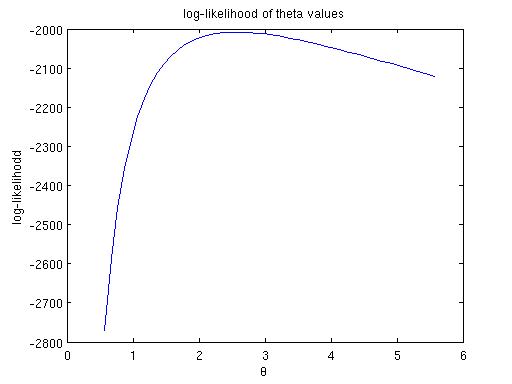

In [5]:
Image(filename='R8_log_likelihood_8_2.png') 

Real Value | Energy function Estimate | Error
--- | --- | ---
3.0 | 2.8660 | 0.1340